In [4]:
import os
# read DICOM data lib
# ref. https://pydicom.github.io/pydicom/stable/getting_started.html
import pydicom
# dicom parser
# ref. https://pypi.org/project/dicompyler-core/
import dicompylercore
from dicompylercore import dicomparser
# array process
# ref. https://numpy.org
# Chinese ref. https://blog.techbridge.cc/2017/07/28/data-science-101-numpy-tutorial/
import numpy as np
# store array
import pickle
# for system operation
import sys
# image
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
dcm_path = "./DATASET/Postive_pure/1_pure_pneumothorax"
label_path = "./DATASET/label2data"

In [2]:
pneu_pixel = []
non_pneu_pixel = []

for dcm in os.listdir(dcm_path):
    file_name, file_extension = os.path.splitext(dcm)
    if(file_extension == ".dcm"):
        print(file_name)
        ds = pydicom.dcmread(os.path.join(dcm_path, dcm))
        # ct image
        dp = dicomparser.DicomParser(ds)
        ct_pixelarray = ds.pixel_array

        # mask
        mask = Image.open(os.path.join(label_path, file_name, "label.png")).convert('L')
        mask = np.array(mask)
        mask[mask > 0] = 1
        mask[mask == 0] = 0
        # mask on dycom
        mask_on_dcm = ct_pixelarray * mask
        non_mask_on_dcm = ct_pixelarray - mask_on_dcm
        pneu_pixel.extend(np.array(mask_on_dcm[mask_on_dcm>0]))
        non_pneu_pixel.extend(np.array(non_mask_on_dcm[non_mask_on_dcm>0]))
#         plt.subplot(1,3,1)
#         plt.imshow(ct_pixelarray, cmap = 'bone')
#         plt.colorbar()      
#         plt.subplot(1,3,2)
#         plt.imshow(mask)     
#         plt.subplot(1,3,3)
#         plt.imshow(non_mask_on_dcm, cmap = 'bone')
#         plt.colorbar()

NameError: name 'dcm_path' is not defined

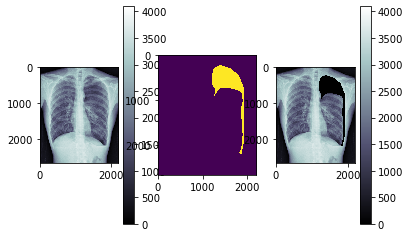

In [3]:
plt.subplot(1,3,1)
plt.imshow(ct_pixelarray, cmap = 'bone')
plt.colorbar()      
plt.subplot(1,3,2)
plt.imshow(mask)     
plt.subplot(1,3,3)
plt.imshow(non_mask_on_dcm, cmap = 'bone')
plt.colorbar()

In [4]:
pneu_pixel = np.array(pneu_pixel)
print(pneu_pixel.shape)
temp = pneu_pixel.flatten()
print(temp)

non_pneu_pixel = np.array(non_pneu_pixel)
print(non_pneu_pixel.shape)
temp = non_pneu_pixel.flatten()
print(temp)

(23567789,)
[1247 1202 1229 ... 3022 3064 2985]
(340425462,)
[278 278 287 ... 379 360 390]


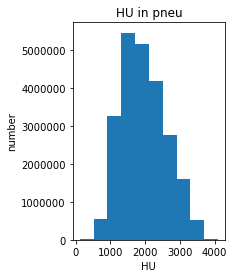

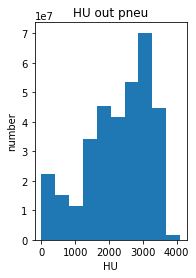

In [8]:
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.title("HU in pneu")
plt.hist(pneu_pixel)
plt.xlabel("HU")
plt.ylabel("number")
plt.show()

plt.subplot(1,2,2)
plt.title("HU out pneu")
plt.hist(non_pneu_pixel)
plt.xlabel("HU")
plt.ylabel("number")
plt.show()

In [9]:
ds.WindowCenter


"2048"

In [10]:
ds.WindowWidth

"4096"

In [11]:
np.mean(pneu_pixel)

1955.8544169756442

In [12]:
np.mean(non_pneu_pixel)

2268.977763284933

In [12]:
ds = pydicom.dcmread("./1_pure_pneumothorax/1.dcm")
# ct image
dp = dicomparser.DicomParser(ds)
ct_pixelarray = ds.pixel_array


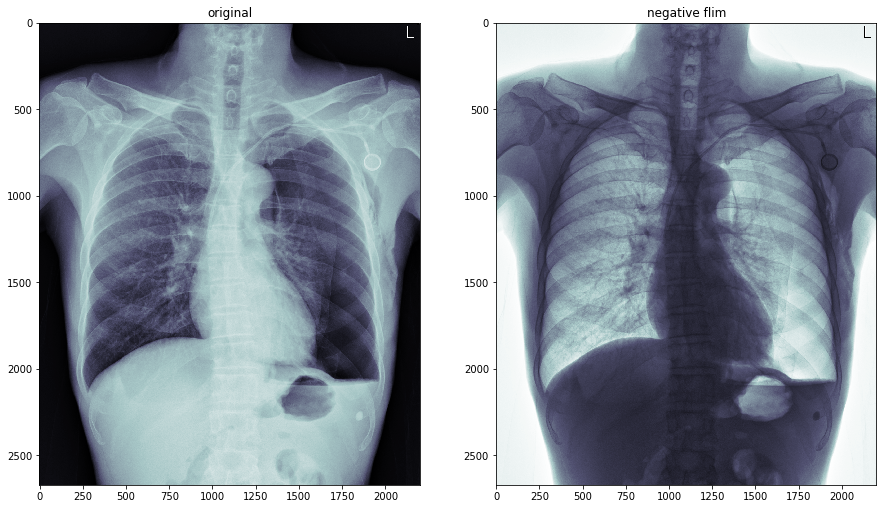

In [16]:
plt.figure(figsize=(15, 15)) 
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(ct_pixelarray, cmap = 'bone')

plt.subplot(1,2,2)
plt.title("negative flim")
plt.imshow(4096-ct_pixelarray, cmap = 'bone')
plt.savefig("./negative_flim")

In [14]:
plt.savefig("./negative_flim")

<Figure size 432x288 with 0 Axes>

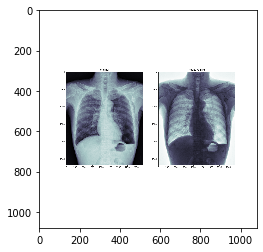

In [17]:
image = Image.open("./negative_flim.png")
image = np.array(image)

plt.imshow(image, cmap = 'bone')

In [39]:
from sklearn import mixture
def gmm_model(train_data, componemt):
    gmm = mixture.GaussianMixture(n_components=componemt)
    gmm.fit(train_data)
    xx = gmm.predict(train_data)
#     num = int(xx.shape[0]/(512**2))
    xx_img = np.reshape(xx, (2672,2200))
    return gmm, xx_img

In [40]:
negative = 4096 - ct_pixelarray

train_data = np.reshape(negative, (2672*2200,1))

In [45]:
model_gmm, result = gmm_model(train_data,5)

In [46]:
result.shape

(2672, 2200)

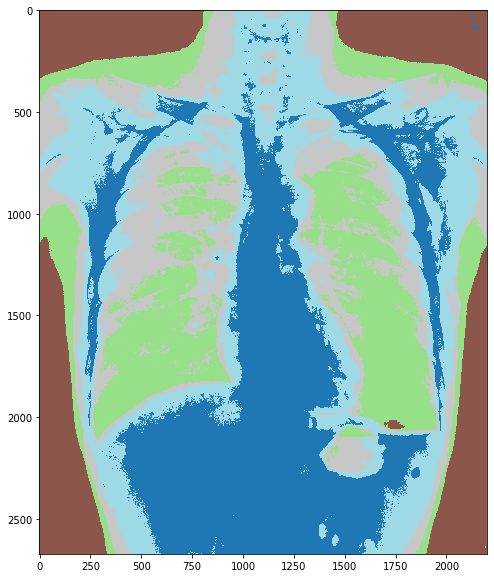

In [47]:
# check how many distribution
np.unique(result)
plt.figure(figsize=(10,10))
plt.imshow(result, cmap='tab20')